# Tutorial OpenCv
## Basics
### Importing the relevant libraries

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Reading images 

In [2]:
img = cv.imread('IMG_0049.JPG')

# Notice that img is 'numpy.ndarray' with ndim=3 : (height, width, (blue, green, red))
cv.imshow('ENPEI_1', img)

cv.waitKey(delay=5000)
# wait [delay] ms for a key to be pressed
# if we passe a 0 or <0 means wait for a key to be pressed with no delay

cv.destroyAllWindows()

### Reading videos from files or using a camera 

In [6]:
# we specify the path of the video or we passe it an integer
# the integer refers to a webcam or a connected camera
capture = cv.VideoCapture(0)

print("Capture opened: ", capture.isOpened())

# capture.set(index, value) works only with live videos
capture.set(3, 100) # 3 refers to the width
capture.set(4, 100) # 4 refers to the height

while True:
    
    isTrue, frame = capture.read()
    
    # to display a video we display continuously (in a while loop) each frame from it
    cv.imshow('WebCam', frame)
    
    if (cv.waitKey(1) & 0xFF) == ord('q'): # break the loop when letter 'q' is pressed
        # Notice we have passed a small enough delay to update the frame
        # the delay mustn't be negatif or null as we want to update the frame
        break

print("Capture is still opened: ", capture.isOpened())
capture.release()
print("Capture released, Opened: ", capture.isOpened())
isTrue, frame = capture.read()
print(isTrue, frame) # (False, None) because the capture is released

cv.destroyAllWindows()

Capture opened:  True
Capture is still opened:  True
Capture released, Opened:  False
False None


### Resizing, rescaling and cropping

In [2]:
img = cv.imread('IMG_0049.JPG')

cv.imshow('Original', img)

# 1. Resizing
resized = cv.resize(img, dsize=(500, 500), interpolation=cv.INTER_CUBIC)
cv.imshow('Resized', resized)

# 2. Rescaling
def rescale(frame, scale=0.5):
    # this function rescales images and video frames
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)
    
    return cv.resize(frame, dsize=(width, height), interpolation=cv.INTER_AREA)

rescaled = rescale(img, 0.2)
cv.imshow('Rescaled', rescaled)

# 3. Cropping
# since img is 'numpy.ndarray' we use array slicing
cropped = img[500: 1000, 1000: 2000]
cv.imshow('Cropped', cropped)

cv.waitKey(0)
cv.destroyAllWindows()

### Painting, drawing and writing 

In [5]:
img1 = np.zeros((500, 500, 3), dtype='uint8')

# 1. paint the image
img1[50:-50, 50: -50] = 255, 255, 255 # (blue, green, red)

# 2. draw a rectangle
cv.rectangle(img1, pt1=(150, 150), pt2=(350, 350), color=(0, 255, 0), thickness=4)

# 3. draw a circle
cv.circle(img1, center=(250, 250), radius=100, color=(0, 0, 255), thickness=-1)
# thickness=-1 means cv.FILLED


# 4. draw a line
cv.line(img1, pt1=(150, 400), pt2=(350, 400), color=(0, 0, 255), thickness=4)

# 5. write text
cv.putText(img1, text='riyouz', org=(255, 255), # org: origin
           fontFace=cv.FONT_HERSHEY_COMPLEX,
           fontScale=2.0, color=(200, 200, 0), thickness=4)

cv.imshow('Blank', img1)
cv.waitKey(0)
cv.destroyAllWindows()

### Image transformations

In [6]:
img = cv.imread('IMG_0049.JPG')
img = rescale(img, 0.3)
cv.imshow('Original', img)

# 1. Translation
def translate(frame, x, y):
    # this function translates images and video frames
    transMatrix = np.float32([[1, 0, x], [0, 1, y]])
    dimensions = frame.shape[1], frame.shape[0]
    return cv.warpAffine(frame, transMatrix, dimensions)

translated = translate(img, -100, 50)
cv.imshow('Translated', translated)

# 2. Rotating
def rotate(frame, angle, center=None, scale=1.0):
    height, width = frame.shape[:2]
    
    if center == None:
        center = width//2, height//2
    
    rotMatrix = cv.getRotationMatrix2D(center, angle, scale)
    return cv.warpAffine(frame, rotMatrix, (width, height))

rotated = rotate(img, -45, scale=0.5)
cv.imshow('Rotated', rotated)

# 3. flip
flip = cv.flip(img, 0)
 # 1 Horizontal flip, 0 vertical flip and -1 both
 # EX: flip = img[::, ::-1] # a horizontal flip using just numpy
cv.imshow('flip', flip)

cv.waitKey(0)
cv.destroyAllWindows()

### Basic functions 

In [7]:
img = cv.imread('IMG_0049.JPG')
img = rescale(img, 0.3)
cv.imshow('Original', img)

# 1. converting on a grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Grayscale', gray)

# 2. Bluring
blur = cv.GaussianBlur(img, ksize=(7, 7), sigmaX=cv.BORDER_DEFAULT)
 # ksize stands for kernel size
cv.imshow('Blur', blur)

# 3. Edge cascade
canny = cv.Canny(img, threshold1=125, threshold2=175)
cv.imshow('Canny', canny)

 # by applying the blur we reduce edges
canny1 = cv.Canny(blur, threshold1=125, threshold2=175)
cv.imshow('Canny1', canny1)

# 4. Dilating the image
dilated = cv.dilate(canny1, kernel=(3, 3), iterations=4)
cv.imshow('Dilated', dilated)

# 5. Eroding
eroded = cv.erode(dilated, kernel=(3, 3), iterations=4)
cv.imshow('Eroded', eroded)


cv.waitKey(0)
cv.destroyAllWindows()

### findContours, threshold ...

In [8]:
img = cv.imread('IMG_0049.JPG')
img = rescale(img, 0.5)
cv.imshow('Original', img)


gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

blur = cv.GaussianBlur(img, (5, 5), cv.BORDER_DEFAULT)
cv.imshow('Blur', blur)


 # remember that bluring reduce the number of edges
canny = cv.Canny(blur, 125, 175)
cv.imshow('Canny', canny)


# Threshold the img
ret, thresh = cv.threshold(gray, thresh=125, maxval=255, type=cv.THRESH_BINARY)

# Threshold With numpy
"""
thresh = np.uint8(gray > thresholdValue)
thresh[thresh == 1] = maxval
"""
cv.imshow('Thresh', thresh)


# Find contours

 # Two arguments can be passed to cv.findContours(...)
    # 1. Canny edges detector
    # 2. The threshold (the binary image)

contours, hierarchies = cv.findContours(canny, mode=cv.RETR_LIST, method=cv.CHAIN_APPROX_NONE)

# draw contours
blank = np.zeros(img.shape)
cv.drawContours(blank, contours, contourIdx=-1, color=(0, 255, 0), thickness=2)
 # contourIdx is the countor index if we set it to -1 so we mean all contours

cv.imshow('Blank', blank)
 


cv.waitKey(0)
cv.destroyAllWindows()
print(f'{len(contours)} contour(s) found!')

353 contour(s) found!


## Advanced
### Color spaces

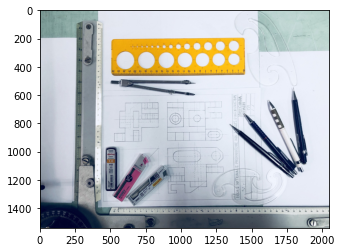

In [9]:
img = cv.imread('IMG_0049.JPG')

cv.imshow('ENPEI_1', img)

# BGR --> GRAYSCALE cv.COLOR_BGR2GARY
# BGR --> HSV cv.COLOR_BGR2HSV
# BGR --> LAB cv.COLOR_BGR2LAB

# EX:
hsv = cv.cvtColor(img, code=cv.COLOR_BGR2RGB)
cv.imshow('HSV', hsv)

# Notice that openCv read images in BGR format (the default)
# so to use another library we should convert the image to RGB

rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv.imshow('RBG', rgb)

# EX using matplotlib
plt.imshow(rgb)
plt.show()


cv.waitKey(0)
cv.destroyAllWindows()

### Color channels 

In [10]:
img = rescale(cv.imread('IMG_0049.JPG'), 0.5)

# split channels
b, g, r = cv.split(img)

# b, g, and r are now grayscale because of the shape (769, 1025)
#print(img.shape)
#print(b.shape)

cv.imshow('Blue', b)
cv.imshow('Green', g)
cv.imshow('Red', r)

# merge channels
merge = cv.merge([b, g, r])
cv.imshow('Merged', merge)

# EX:
blank = np.zeros(img.shape[:2], np.uint8)
blue = cv.merge([b, blank, blank])
cv.imshow('Blue_merged', blue)

cv.waitKey(0)
cv.destroyAllWindows()

### Bluring 

In [11]:
img = rescale(cv.imread('IMG_0049.JPG'), 0.5)

# 1. Average bluring
 # this takes the average of the surrounding pixels of the kernel
average = cv.blur(img, ksize=(3, 3))
cv.imshow('Average Blur', average)

 # EX: Average bluring with numpy
x = img[5:8, 6:9] # x represents the kernel
print(np.round(np.average(x, axis=(0,1))), average[6, 7])

# 2. Gaussian bluring
gauss = cv.GaussianBlur(img, (3, 3), 0)
cv.imshow('Gaussian Blur', gauss)

# 3. Median bluring
 # this takes the median of the surrounding pixels of the kernel
median = cv.medianBlur(img, 3)
cv.imshow('Median Blur', median)

 # EX: Median bluring with numpy
x = img[ :3, :3] # x represents the kernel
print(np.median(x, axis=(0,1)), median[1, 1])

# 4. Bilateral bluring
bilateral = cv.bilateralFilter(img, d=10, sigmaColor=35, sigmaSpace=25)
cv.imshow('Bilateral', bilateral)

cv.waitKey(0)
cv.destroyAllWindows()

[144. 148. 119.] [144 148 119]
[143. 146. 120.] [143 146 120]


### Bitwise operators and masking 

In [20]:
blank = np.zeros((500, 500), dtype=np.uint8)
img = cv.resize(cv.imread('IMG_0049.JPG'), (500, 500))

rectangle = cv.rectangle(blank.copy(), (100, 100), (400, 400), 255, -1)
circle = cv.circle(blank.copy(), (250, 250), 180, 255, -1)

cv.imshow('Rectangle', rectangle)
cv.imshow('Circle', circle)

# 1. bitwise AND
bitwise_and = cv.bitwise_and(rectangle, circle)
cv.imshow('Bitwise_and', bitwise_and)

# 2. bitwise OR
bitwise_or = cv.bitwise_or(rectangle, circle)
cv.imshow('Bitwise_or', bitwise_or)

# 3. bitwise XOR
bitwise_xor = cv.bitwise_xor(rectangle, circle)
cv.imshow('Bitwise_xor', bitwise_xor)

# 4. bitwise NOT
bitwise_not = cv.bitwise_not(rectangle, circle)
cv.imshow('Bitwise_not', bitwise_not)
 # the 2 sources images have to be with the same shape

# 5. masking
mask = cv.circle(blank.copy(), (250,250), 200, 1, -1)
img = cv.bitwise_and(img, img, mask=mask)
# the mask has to be binary (grayscale) with the same size to the image
cv.imshow('Masked', img)


cv.waitKey(0)
cv.destroyAllWindows()